In [2]:
import pandas as pd
import mysql.connector as mysql
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mysql.connector as mysql
import numpy as np

# Configuração da conexão com o banco de dados
config = {
  'user': 'root',
  'password': 'Database@2023',
  'host': 'localhost',
  'database': 'csgo'
}

# Conexão com o banco de dados
cnx = mysql.connect(**config)
# Criação do cursor
cursor = cnx.cursor()

# Consulta para selecionar todos os dados da tabela
query_picks = "SELECT * FROM picks"

# Execução da consulta
cursor.execute(query_picks)

# Obtenção dos resultados
picks = cursor.fetchall()

# Obtenção dos nomes das colunas
col_names_picks = [desc[0] for desc in cursor.description]

# Fechamento do cursor e da conexão
cursor.close()
cnx.close()


ModuleNotFoundError: No module named 'matplotlib'

In [2]:
# Conversão dos resultados em um DataFrame do Pandas
df_picks = pd.DataFrame(picks, columns=col_names_picks)

In [3]:
df_picks.head()

,date,team_1,team_2,inverted_teams,match_id,event_id,best_of,system_,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3,t1_picked_1,t2_picked_1,left_over
0,2020-03-18,TeamOne,Recon 5,1,2340454,5151,3,123412,Vertigo,Train,0.0,Nuke,Overpass,0.0,Dust2,Inferno,Mirage\r
1,2020-03-18,Rugratz,Bad News Bears,0,2340453,5151,3,123412,Dust2,Nuke,0.0,Mirage,Train,0.0,Vertigo,Inferno,Overpass\r
2,2020-03-18,New England Whalers,Station7,0,2340461,5243,1,121212,Mirage,Dust2,Vertigo,Nuke,Train,Overpass,0.0,0.0,Inferno\r
3,2020-03-17,Complexity,forZe,1,2340279,5226,3,123412,Inferno,Nuke,0.0,Overpass,Vertigo,0.0,Dust2,Train,Mirage\r
4,2020-03-17,Singularity,Endpoint,0,2340456,5247,3,123412,Train,Mirage,0.0,Nuke,Inferno,0.0,Overpass,Vertigo,Dust2\r


In [4]:
df_removidos = df_picks[['t1_removed_1', 't1_removed_2','t1_removed_3', 't2_removed_1', 't2_removed_2','t2_removed_3']]

In [5]:
df_removidos

,t1_removed_1,t1_removed_2,t1_removed_3,t2_removed_1,t2_removed_2,t2_removed_3
0,Vertigo,Train,0.0,Nuke,Overpass,0.0
1,Dust2,Nuke,0.0,Mirage,Train,0.0
2,Mirage,Dust2,Vertigo,Nuke,Train,Overpass
3,Inferno,Nuke,0.0,Overpass,Vertigo,0.0
4,Train,Mirage,0.0,Nuke,Inferno,0.0
...,...,...,...,...,...,...
16030,Dust2,Cobblestone,Mirage,Cache,Inferno,Overpass
16031,Inferno,Train,Mirage,Overpass,Cobblestone,Cache
16032,Dust2,Cache,Inferno,Train,Overpass,Cobblestone
16033,Overpass,Cobblestone,Cache,Dust2,Inferno,Mirage


In [6]:
# conta as remoções dos mapas na equipe 1
t1_removed_counts = df_picks['t1_removed_1'].value_counts() + \
                    df_picks['t1_removed_2'].value_counts() + \
                    df_picks['t1_removed_3'].value_counts()

In [7]:
t1_removed_counts_sort = t1_removed_counts.sort_values()

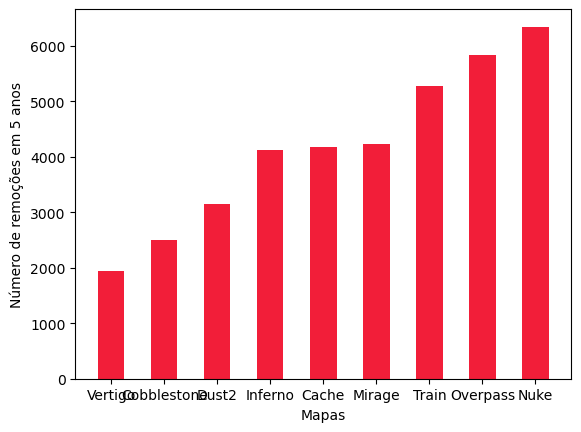

In [8]:
# plota o gráfico de linhas
plt.bar(t1_removed_counts_sort.index, t1_removed_counts_sort.values, width=0.5, color='#f21e39')

# configura os rótulos dos eixos x e y
plt.xlabel('Mapas')
plt.ylabel('Número de remoções em 5 anos')

# exibe o gráfico
plt.show()

Neste gráfico, vemos os mapas mais removidos nas escolhas de mapas de cada partida, entre os anos de 2015-2020. Porém, vale lembrar, segundo o gráfico de comparações dos mapas mais escolhidos, que é possível notar que o mapa Vertigo, começou a ser jogado em -, e o Cobblestone foi retirado das escolhas para sua 